In [38]:
import pandas as pd
import csv

In [2]:
data = pd.read_csv('gss.csv')

<ipython-input-2-7a8c04cf292f>:1: DtypeWarning: Columns (5,6,12,25,43,44,45,46,64,65,66,67,68,75,76,79,80,88,92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('gss.csv')


## FRIST IS NEEDED TO EXAMINE DE DATA TO KNOW THE NAME OF THE COLUMNS, AS IS STATED ABOVE THAT THERE ARE SEVERAL COLUMNS WITH DIFFERENT DATA TYPES.

THE DATA IS TAKEN FROM THE "GENERAL SOCIAL SURVEY" FROM THE UNIVERSITY OF CHICAGO from 1972 and 2012.

In [4]:
data.head()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,NaN,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,12.0,...,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## THERE IS A DICTIONARY FOR THE COLUMNS NAMES, THEREFORE DURING THE ANALYSIS THERE WILL BE EXPLANATIONS FOR BETTER UNDERSTANDING.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57061 entries, 0 to 57060
Columns: 114 entries, caseid to helpblk
dtypes: float64(13), int64(2), object(99)
memory usage: 49.6+ MB


In [7]:
data.describe()

,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
count,57061.000000,57061.000000,56859.000000,56897.000000,40173.000000,46929.000000,29626.000000,31277.000000,55382.000000,56880.000000,18119.000000,44996.000000,51232.000000,9854.000000,33855.000000
mean,28531.000000,1992.084261,45.697955,12.753590,10.554004,10.713844,12.780328,48.423570,3.940053,1.952848,23.787130,1.154547,44503.038316,4.772681,2.970699
std,16472.236192,11.724820,17.472112,3.181642,4.349151,3.744795,3.128766,19.183154,3.190929,1.791539,5.432127,1.604481,35936.012301,1.855722,2.353317
min,1.000000,1972.000000,18.000000,0.000000,0.000000,0.000000,0.000000,17.100000,0.000000,0.000000,9.000000,0.000000,383.000000,1.000000,0.000000
25%,14266.000000,1983.000000,31.000000,12.000000,8.000000,8.000000,12.000000,32.400002,2.000000,0.000000,20.000000,0.000000,18445.000000,4.000000,2.000000
50%,28531.000000,1993.000000,43.000000,12.000000,12.000000,12.000000,12.000000,39.000000,3.000000,2.000000,23.000000,0.000000,35602.000000,5.000000,2.000000
75%,42796.000000,2002.000000,59.000000,15.000000,13.000000,12.000000,15.000000,63.500000,5.000000,3.000000,27.000000,2.000000,59542.000000,6.000000,4.000000
max,57061.000000,2012.000000,89.000000,20.000000,20.000000,20.000000,20.000000,97.199997,68.000000,8.000000,65.000000,4.000000,180386.000000,10.000000,24.000000


## GENERAL DESCRIPTION OF THE DATA ABOVE. SOME DATA TYPES, EVEN THOUGH ARE NUMERICAL, THERE IS NO NEED TO MAKE ALL THE STATISTICAL DESCRIPTIONS, THEREFORE SOME STATISTICAL DESCRIPTIONS CAN BE IGNORED.

### ONE EXAMPLE WOULD BE THE CASEID WICH IS ONLY FOR IDENTIFICATION PRUPOUSES DURING DATA EXPLORATION.

### OTHER EXAMPLE WOULD BE THE YEAR, WICH CAN BE USED FOR KNOWING WICH YEARS HAVE MORE REGISTRIES, SO IN CASE WE NEED TO EXTRACT A INTERVAL FOR A HYPOTESIS, A DENSER SAMPLE WOULD MEAN A SMALLER INTERVAL.

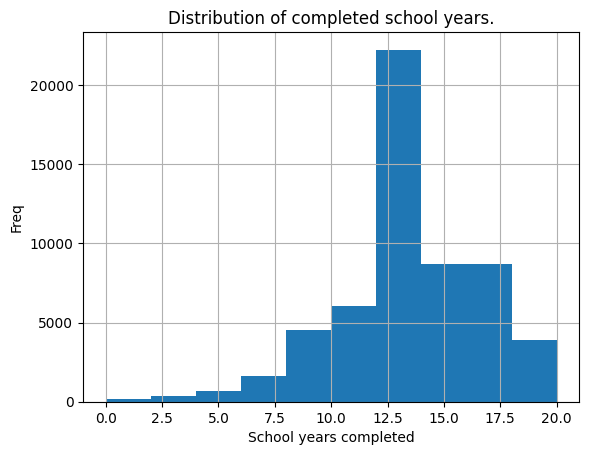

In [23]:
data['educ'].hist()
plt.xlabel('School years completed')
plt.ylabel('Freq')
plt.title('Distribution of completed school years.')
plt.show()


## THE 'EDUC' COLUMN COUNTS THE NUMBER OF COMPLETED SCHOOL YEARS DECLARED BY THE PERSON SURVEYED. THE HISTOGRAM IS SOMEWHAT NORMAL IN DISTRIBUTION.

### IT CAN BE SEEN THAT THE MAYORITY OF THE SURVEYED PEOPLE DECLARES ABOUT 13 YEARS OF COMPLETED SCHOOL YEARS, WICH GOES ACCORDINGLY WITH THE MEAN ABOVE WICH IS 12.75. THIS IS NOT NECESARILY TRUE IN ALL DATASETS, GENERALLY SPEAKING, THE BIGGER THE STANDARD DEVIATION IS LESS PROBABLE THAT THE MODE IS SIMILAR THE MEAN, THIS IS NOT A RULE, IT CAN OCCUR THE CONTRARY, BUT THAT WOULD MEAN THERE IS A BIGGER PEAK THAN IN THIS CASE, WICH WOULD NEED A DIFFERENT ANALYSIS.

In [16]:
import statsmodels.api as sm

In [19]:
prop_guns = data['owngun'].value_counts(normalize=True)
print("Proportion of people owning at least one  gun at home:", prop_guns[1])

Proportion of people owning at least one  gun at home: 0.4062799268696132


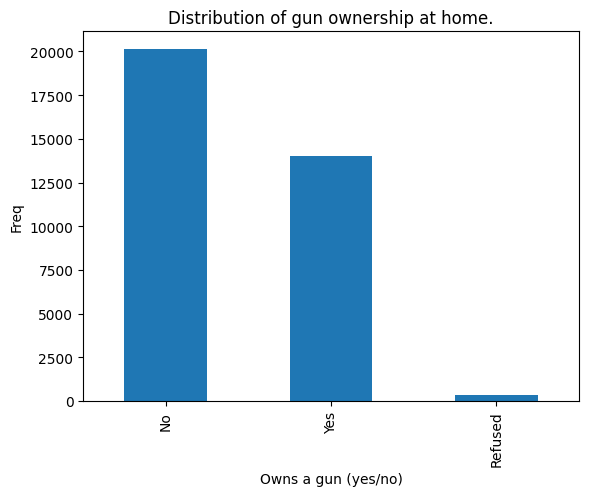

In [22]:
data['owngun'].value_counts().plot(kind='bar')
plt.xlabel('Owns a gun (yes/no)')
plt.ylabel('Freq')
plt.title('Distribution of gun ownership at home.')
plt.show()

## FIRST IS VISUALIZED THE FREQUENCY OF PEOPLE SURVEYED WITH AT LEAST ONE GUN AT HOME.

In [39]:
!pip install statsmodels

In [41]:
from scipy.stats import chi2_contingency

# NOW LETS PRETEND A DATA PROFESSIONAL ASKED TO DETERMINE IF THERE IS A RELATIONSHIP BETWEEN GUN OWNERSHIP AND EDUCATION, SO INSTEAD OF GUN REGULATION, THE GOVERMENT COULD MAKE EDUCATION BASED STRATEGIES TO IMPOROVE GUN CONTROL WITHOUT THE POLITICAL BACKLASH THAT COMES WITH A MORE DIRECT APROACH.

H0: THERE IS NO ASSOCIATION BETWEEN THE NUMBER OF YEARS OF EDUCATION COMPLETED (EDUC) AND GUN OWNERSHIP (OWNGUN).
HA: THERE IS A DIRECT ASSOCIATION BETWEEN THE NUMBER OF YEARS OF EDUCATION COMPLETED AND GUN OWNERSHIP.

SINCE THERE IS A NUMERIC DATA COLUMN AND A CATEGORIC DATA COLUMN, CHI SQUARED APROACH IS USED TO DETERMINE IF THERE IS RELATION BETWEEN THOSE COLUMNS.

In [42]:
contingency_table = pd.crosstab(data['educ'], data['owngun'])
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print("Chi-square test:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value_chi2)

Chi-square test:
Chi-square statistic: 334.19316733434397
p-value: 4.307418318315088e-48


### WITH THAT CONSIDERABLY BIG CHI SQUARED STATISTIC AND A EXCEPTIONALLY LOW P VALUE, MUCH LOWER THAN 0.05 WICH WOULD BE STATISTICALLY SIGNIFICANT, THE H0 CAN BE REJECTED, THEREFORE THE EVIDENCE GOES IN FAVOR TO BE THE EDUCATION A GOOD MEASURE FOR GUN CONTROL, AND A STRATEGY CAN BEGIN TO BE DEVELOPED. IN  THIS CASE IT WOULD BE A GOOD IDEA TO GATHER MORE DATA TO MEASURE WICH APROACH WITH EDUCATION WOULD BE THE BEST TO MAXIMICE RESULTS WITH THE LEAST RESOURSES SPENT IN THE EXECUTION OF THE PROJECT.